In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [106]:
df.shape

(3168, 21)

In [107]:
d1 = df.isnull().sum()

In [108]:
df.duplicated().sum()

2

In [140]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

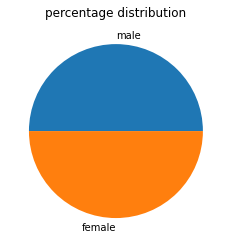

In [144]:
k = ['male','female']
fig, ax = plt.subplots()
ax.pie((df['label'].value_counts()*100)/df.shape[0], labels =k)
ax.set_title('percentage distribution')
plt.show()

In [110]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])

In [124]:
[df['label'].value_counts()]

[1    1584
 0    1584
 Name: label, dtype: int64]

In [114]:
 df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

In [83]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [84]:
print(x.shape)
print(y.shape)

(3168, 20)
(3168,)


In [85]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [86]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [89]:
from sklearn.metrics import confusion_matrix,classification_report

In [90]:
def apply_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print('training score\n',model.score(x_train,y_train))
    print('testing score\n',model.score(x_test,y_test))
    print('predicted value\n',ypred)
    print('confusion matrix\n',cm)
    print('classification report\n',classification_report(y_test,ypred))

### Applying Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
m1 = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=25)
apply_model(m1,x_train,y_train,x_test,y_test)

training score
 0.9834254143646409
testing score
 0.9526813880126183
predicted value
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1
 0 0 1 1 1 0 1

### Applying Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
m2 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=11,min_samples_split=27)
apply_model(m2,x_train,y_train,x_test,y_test)

training score
 0.988950276243094
testing score
 0.9763406940063092
predicted value
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1
 0 0 1 1 1 1 1 

### Applying KNN Classifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
m3 = KNeighborsClassifier(n_neighbors=90)
apply_model(m3,x_train,y_train,x_test,y_test)

training score
 0.702052091554854
testing score
 0.6624605678233438
predicted value
 [0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0
 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0
 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1
 0 1 1 1 1 0 0 

### Applying SVM Classifier

In [97]:
from sklearn.svm import SVC

In [98]:
m4 = SVC(kernel='linear',C=100)
apply_model(m4,x_train,y_train,x_test,y_test)

training score
 0.9684293606945541
testing score
 0.9716088328075709
predicted value
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1
 0 0 1 1 1 1 1

###  Applying LogisticRegression Classifier

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
m5 = LogisticRegression(solver='liblinear')
apply_model(m5,x_train,y_train,x_test,y_test)

training score
 0.9084451460142068
testing score
 0.916403785488959
predicted value
 [0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1
 0 0 1 1 1 1 1 